**Inplementación de algoritmos de integración numericas**


> **Autor:** Jose Luis Barba Farro



> **Fecha: Agosto - 2021**




In [1]:
import pandas as pd
import numpy as np
from math import *
import sympy as sym
import numpy as np

In [2]:
def function(funcion,numero):
  x = sym.symbols('x')
  expresion = funcion
  return (sym.sympify(expresion).subs(x,numero))

**Interpolacion**

In [3]:
def interpolacion_lagrange(tabla,min=None,max=None):
  n = len(tabla)
  x = sym.Symbol('x')
  MAX = max
  MIN = min
  Pi = 0
  for i in range(0,n):
    #para lagrange 
    numerador = 1
    denominador = 1
    for j in range(0,n):
      if(j != i):
         numerador = numerador * (x - tabla['valores X'][j])
         denominador = denominador * (tabla['valores X'][i] - tabla['valores X'][j])
    Li = numerador/denominador

    Pi = Pi + Li*tabla['valores Y'][i]
    return Pi

**Integral doble iterada**

In [ ]:
def Integral_Doble_R(division_x,division_y,funcion,a,b,c,d):
  h = (b-a)/division_x
  k = (d-c)/division_y
  imagenes = []
  for i in range(0,division_x+1):
    xi = a + i * h
    for j in range(0,division_y+1):
      yj =  c + j * k
      imagenes.append(funcion(xi,yj))
  return (h*k*sum(imagenes))



**Newton Cotes Cerrada**

In [ ]:
def Newton_Cotes_Cerrada(funcion=None,tabla=None,a=None,b=None,n=100):
  if funcion == None:
    try:
      funcion = function(interpolacion_lagrange(tabla=tabla))
      h = (b-a)/n
      Regla_trapezoidal = lambda x0,x1:(h/2)*(function(funcion,x0)+ function(funcion,x1))
      Regla_Simpsom_un_tercio = lambda x0,x1,x2:(h/3)*(function(funcion,x0)+4*function(funcion,x1)+function(funcion,x2))
      Regla_Simpsom_tres_octavos = lambda x0,x1,x2,x3: (3*h/8)*(function(funcion,x0)+3*function(funcion,x1)+3*function(funcion,x2)+function(funcion,x3))
      Regla_n_4 = lambda x0,x1,x2,x3,x4:(2*h/45) * (7*function(funcion,x0)+32*function(funcion,x1)+12*function(funcion,x2)+32*function(funcion,x3)+7*function(funcion,x4))
    except Exception as e:
      print("Ocurrión una excepcion tipo: ",e)
  else:
    try:
      h = (b-a)/n
      Regla_trapezoidal = lambda x0,x1:(h/2)*(funcion(x0)+ funcion(x1))
      Regla_Simpsom_un_tercio = lambda x0,x1,x2:(h/3)*(funcion(x0)+4*funcion(x1)+funcion(x2))
      Regla_Simpsom_tres_octavos = lambda x0,x1,x2,x3: (3*h/8)*(funcion(x0)+3*funcion(x1)+3*funcion(x2)+funcion(x3))
      Regla_n_4 = lambda x0,x1,x2,x3,x4:(2*h/45) * (7*funcion(x0)+32*funcion(x1)+12*funcion(x2)+32*funcion(x3)+7*funcion(x4))
    except Exception as e:
      print("Ocurrión una excepcion tipo: ",e)
      
  funciones = [Regla_trapezoidal,Regla_Simpsom_un_tercio,Regla_Simpsom_tres_octavos,Regla_n_4]
  xi = [] 

  for i in range(1,n+1):
    xi.append(a+i*h)
    if n == 1:
      return funciones[i](xi[0])
    elif n == 2:
      return funciones[i](xi[0],xi[1])
    elif n == 3:
      return funciones[i](xi[0],xi[1],xi[2])
    elif n == 4:
      return funciones[i](xi[0],xi[1],xi[2],xi[3])
    else:
      print("Logger: Las formulas son del 1 al 4.")

  
  



**Integración numerica compuesta**

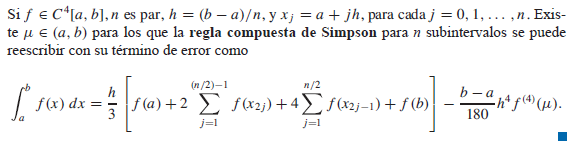

In [4]:
def regla_compuesta_simpson(funcion,a,b,n=None, error=None):
  if (n == None) and (error != None):
    n = int(ceil((((b - a)**5)/(180*error))**0.25))

  if n%2 != 0:
    n += 1

  if type(funcion) == type("cadena"):
    h = (b-a)/n
    fun = lambda numero: (sym.sympify(funcion).subs(sym.symbols('x'),numero))
    XI0 = fun(a) + fun(b)
    XI1 = 0 #suma de f(X2j-1)
    XI2 = 0 #suma de f(X2j)
    #Para  j = 1, 2, ... n-1 realizar los siguientes pasos 4, 5
    for j in range(1,n):
      xj = a  + j*h
      if j % 2 == 0:
        XI2 = XI2 + fun(xj)
      else:
        XI1 = XI1  + fun(xj)
    XI = h * (XI0 + 2*XI2 + 4*XI1)/3
    return XI
  else:
    h = (b-a)/n
    XI0 = funcion(a) + funcion(b)
    XI1 = 0 #suma de f(X2j-1)
    XI2 = 0 #suma de f(X2j)
    #Para  j = 1, 2, ... n-1 realizar los siguientes pasos 4, 5
    for j in range(1,n):
      xj = a  + j*h
      if j % 2 == 0:
        XI2 = XI2 + funcion(xj)
      else:
        XI1 = XI1  + funcion(xj)
    XI = h * (XI0 + 2*XI2 + 4*XI1)/3
    return XI


  

In [5]:
def regla_compuesta_trapezoidal(funcion,a,b,n=None,error=None):
  if (n == None) and (error != None):
    n = ceil((((b - a)**3)/(12*error))**0.5)
  h = (b-a)/n
  if (type(funcion)== type("str")):
    fun = lambda numero: (sym.sympify(funcion).subs(sym.symbols('x'),numero))
    XI = 0
    for j in range(1,n):
      xj = a + j*h
      XI += fun(xj)
    I = (h/2)*(fun(a)+2*XI+fun(b)) 
    return I
  else:
    XI = 0
    for j in range(1,n):
      XI += funcion(xj(j))
    I = (h/2)*(funcion(a)+2*XI+funcion(b)) 
    return I



In [7]:
def regla_compuesta_punto_medio(funcion,a,b,n=None,error=None):
  if (n == None) and (error != None):
    n = int(ceil(((((b - a)**3)/(6*error))**0.5)-2))
  if n%2 != 0:
    n += 1
  h = (b-a)/(n-2)
  if type(funcion) == type("cadena"):
    fun = lambda numero: (sym.sympify(funcion).subs(sym.symbols('x'),numero))
    FX2J = sum([fun(2*(a + (j+1)*h)) for j in range(0,int((n/2)+1))])
    I = 2*h*FX2J
    return I
  else:
    
    FX2J = sum([funcion(2*(a + (j+1)*h)) for j in range(0,(n/2)+1)])
    I = 2*h*FX2J
    return I


In [8]:
def integracion_de_Romberg(funcion,a,b,n):
  tabla = []
  if n <= 0:
    print("El valor de n debe ser mayor de 0")
    return None
  h = b - a
  R = np.zeros((n+1,n+1))
  if type(funcion) == type("cadena"):
    fun = lambda numero: (sym.sympify(funcion).subs(sym.symbols('x'),numero))
    R[1][1] = (h/2)*(fun(a)+fun(b))
    tabla.append([R[1][1],])
    for i in range(2,n+1):
      sumatoria = sum([fun(a + (k-0.5)*h) for k in range(1,(2**(i-2))+1)])
      R[2][1] = (0.5)*(R[1][1] + h*sumatoria )
      #aproxinaxion a partir del método trapezoidal
      for j in range(2,i+1):
        R[2][j] = R[2][j-1] + (R[2][j-1] - R[1][j-1])/((4**(j-1))-1) #extrapolación
      tabla.append(R[2])
      h = h/2
      for j in range(1,i+1):
        R[1][j]=R[2][j]  #actualice la fila 1 de R
  else:
    fun = funcion
    R[1][1] = (h/2)*(fun(a)+fun(b))
    tabla.append([R[1][1],])
    for i in range(2,n+1):
      sumatoria = sum([fun(a + (k-0.5)*h) for k in range(1,(2**(i-2))+1)])
      R[2][1] = (0.5)*(R[1][1] + h*sumatoria )
      #aproxinaxion a partir del método trapezoidal
      for j in range(2,i+1):
        R[2][j] = R[2][j-1] + (R[2][j-1] - R[1][j-1])/((4**(j-1))-1) #extrapolación
      tabla.append(R[2])
      h = h/2
      for j in range(1,i+1):
        R[1][j]=R[2][j]  #actualice la fila 1 de R
  return(tabla[len(tabla)-1][len(tabla[len(tabla)-1])-1])

      
  


**Cuadratura Gaussiana**

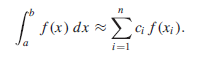

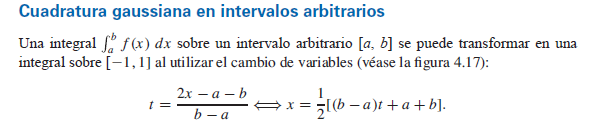

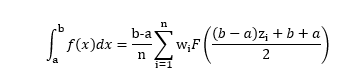

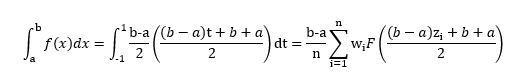



In [ ]:
def cuadratura_gaussiana(funcion,a,b,n):
  tabla = {}
  if n == 2:
    tabla = {1:[0.5773502692,1],2:[-0.5773502692,1]}
  elif n == 3:
          #zi -> 0      |   wi -> 1
          #.........................
    tabla = {
        1:[0.7745966692,0.5555555556],
        2:[0.0000000000,0.8888888889],
        3:[-0.7745966692,0.5555555556],
    }
  elif n == 4: 
    tabla = {
        1:[0.8611363116,0.3478548451],
        2:[0.3399810436,0.6521451549],
        3:[-0.3399810436,0.6521451549],
        4:[-0.8611363116,0.3478548451],
    }
  elif n == 5:
    tabla = {
        1:[0.9061798459,0.2369268850],
        2:[0.5384693101,0.4786286705],
        3:[0.0000000000,0.5688888889],
        4:[-0.5384693101,0.4786286705],
        5:[-0.9061798459,0.2369268850],
    }
  elif n==6 :
    tabla = {
        1:[0.9324695142,0.1713244924],
        2:[0.6612093865,0.3607615730],
        3:[0.2386191861,0.4679139346],
        4:[-0.2386191861,0.4679139346],
        5:[-0.6612093865,0.3607615730],
        6:[-0.9324695142,0.1713244924],
    }
  else:
    print("No se pudo encontrar las raices y coeficientes del polinomio")
    return None
  wF = 0
  if (a==-1) and (b==1):
    for i in range(1,n+1):
      wF += tabla[i][1]*funcion(tabla[i][0])
  else:
    for i in range(1,n+1):
      z = (((b-a)*tabla[i][0])+(b+a))/2
      wF += tabla[i][1]*funcion(z)
      print(tabla[i][1],":",tabla[i][0])
  area = ((b-a)/2) * wF
  return area


##**Integral Doble**

Regiones no rectangulares

In [ ]:
def integraldoble_simpsom_region_no_rectangular(funcion,a,b,F,G,m,n):
  #paso 1:
  h = (b-a)/(n)
  J1 = 0 #termino finales
  J2 = 0 #termino finales
  J3 = 0 #termino finales
  #paso 2  -> 3 - 8
  for i in range(0,(n)+1): #metodo compuesto de simpson para x
    x = a + i*h #paso 3
    HX = (G(x)- F(x))/(m)
    K1 = funcion(x,F(x)) + funcion(x,G(x)) #termino finales
    K2 = 0 #terminos pares
    K3 = 0 #terminos impares
    #paso 4:
    for j in range(1,(m)): #haga 5-6
      #paso 5: haga que
      y = F(x) + j*HX
      Q = funcion(x,y)
      #paso 6:
      if j%2==0:
        K2 += Q
      else:
        K3 += Q
    #paso 7: Haga
    L = (K1+2*K2+4*K3)*HX/3 
    #SF(xi)->G(xi) f(xi,y)dy mediante metodo compuesto de simpsom
    #paso 8:
    if (i==0) or (i==(n)):
      J1 += L
    else:
      if i%2==0:
        J2 += L
      else:
        J3 += L #paso final 2
  #paso 9:
  J = h*(J1+2*J2+4*J3)/3
  return J
    


**Integral doble por cuadratura gaussiana**

In [ ]:
def coeficientes(n):
  tabla = {}
  if n == 2:
    tabla = {1:[0.5773502692,1],2:[-0.5773502692,1]}
  elif n == 3:
          #zi -> 0      |   wi -> 1
          #.........................
    tabla = {
        1:[0.7745966692,0.5555555556],
        2:[0.0000000000,0.8888888889],
        3:[-0.7745966692,0.5555555556],
    }
  elif n == 4: 
    tabla = {
        1:[0.8611363116,0.3478548451],
        2:[0.3399810436,0.6521451549],
        3:[-0.3399810436,0.6521451549],
        4:[-0.8611363116,0.3478548451],
    }
  elif n == 5:
    tabla = {
        1:[0.9061798459,0.2369268850],
        2:[0.5384693101,0.4786286705],
        3:[0.0000000000,0.5688888889],
        4:[-0.5384693101,0.4786286705],
        5:[-0.9061798459,0.2369268850],
    }
  elif n==6 :
    tabla = {
        1:[0.9324695142,0.1713244924],
        2:[0.6612093865,0.3607615730],
        3:[0.2386191861,0.4679139346],
        4:[-0.2386191861,0.4679139346],
        5:[-0.6612093865,0.3607615730],
        6:[-0.9324695142,0.1713244924],
    }
  else:
    print("No se pudo encontrar las raices y coeficientes del polinomio")
    return None
  return tabla

In [ ]:
def integral_doble_gaussiana(funcion,a,b,c,d,m,n):
  #paso 1: haga
  h1 = (b-a)/2
  h2 = (b+a)/2
  Q = 0
  J = 0
  JX = 0
  tabla1 = coeficientes(m)
  tabla2 = coeficientes(n)
  #paso 2: haga los pasos 3-5
  for i in range(1,m+1):
    #paso 3
    JX = 0
    x = h1*tabla1[i][0]+h2
    d1 = d(x)
    c1 = c(x)
    k1 = (d1 - c1)/2
    k2 = (d1 + c1)/2
    #paso 4
    for j in range(1,n+1):
      y = k1*tabla2[j][0] + k2
      Q = funcion(x,y)
      JX = JX + tabla2[j][1]*Q
    #paso 5
    J += tabla1[i][1]*k1*JX #paso final 2
  J = h1*J
  return J
  

**Integral triple Gaussiana**

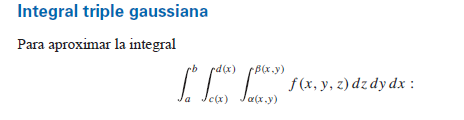

In [ ]:
def integral_triple_gaussiana(funcion,a,b,C,D,A,B,m,n,p):
  #paso1:
  h1 = (b-a)/2
  h2 = (b+a)/2
  J = 0
  M = coeficientes(m)
  N = coeficientes(n)
  P = coeficientes(p)
  #paso 2: haga los pasos 3-8
  for i in range(1,m+1):
    #paso 3:
    JX = 0
    x = h1 * M[i][0] + h2
    d1 = D(x)
    c1 = C(x)
    k1 = (d1 - c1)/2
    k2 = (d1 + c1)/2
    #paso 4: 5-7
    for j in range(1,n+1):
      #paso 5
      JY = 0
      y = k1*N[j][0] + k2
      B1 = B(x,y)
      A1 = A(x,y)
      l1 = (B1-A1)/2
      l2 = (B1 + A1)/2
      #paso 6
      for k in range(1,p+1):
        z = l1*P[k][0] +l2
        Q = funcion(x,y,z)
        JY += P[k][1]*Q
      #paso 7: final del 4
      JX += N[j][1]*l1*JY
    #paso 8: final del paso 2
    J += M[i][1]*k1*JX
  #paso 9:
  J = h1*J
  return J
   



**Algunas funciones de prueba**

In [ ]:
f = lambda x,y: log(x + 2*y)
Integral_Doble_R(100,100,f,1.4,2,1,1.5) 

0.4381686171856189

In [ ]:
f2 = lambda x: exp(x)
regla_compuesta_simpson(f2,0,pi,error=0.00002)

22.140806357641917

In [ ]:
f3 = lambda x: sin(x)
regla_compuesta_trapezoidal("sin(x)",0,pi,error=0.00002)


1.99998730759140

In [ ]:
regla_compuesta_punto_medio("sin(x)",0,pi,n=None,error=0.00002)

1.99951176445723

In [ ]:
print(integracion_de_Romberg(f3,0,pi,6))



2.000000000001321


In [ ]:
f5 = lambda x: exp(-(x**2)/2)/((2*pi)**0.5)
#
cuadratura_gaussiana(f5,-0.8,1.5,5)

0.236926885 : 0.9061798459
0.4786286705 : 0.5384693101
0.5688888889 : 0.0
0.4786286705 : -0.5384693101
0.236926885 : -0.9061798459


0.7213378612974849

In [ ]:
f4 = lambda x,y: (x**2)*exp(x*y)
f = lambda x: 0*x
g = lambda x: x
integraldoble_simpsom_region_no_rectangular(f4,0,3,f,g,100,100)

4046.5745032392592

In [ ]:
z = lambda x,y: exp(y/x)
d = lambda x: x**2
c = lambda x: x**3

integral_doble_gaussiana(z,0.1,0.5,c,d,5,5)

0.033305566114962486

In [ ]:
c = lambda x: -((4-(x**2))**0.5)
d = lambda x: ((4-(x**2))**0.5)
A = lambda x,y: ((x**2)+(y**2))**0.5
B = lambda x,y: 2 
Z = lambda x,y,z: z*(((x**2)+(y**2))**0.5)
integral_triple_gaussiana(Z,-2,2,c,d,A,B,6,6,5)

13.532723209416654

In [ ]:
c = lambda x: -((25-(x**2))**0.5)
d = lambda x: ((25-(x**2))**0.5)
A = lambda x,y: 0
B = lambda x,y: 8-x-y
Z = lambda x,y,z: 1
integral_triple_gaussiana(Z,-5,5,c,d,A,B,6,6,6)

629.5455934405225

In [ ]:
f = lambda x: (x**2)*exp(x)
integral = regla_compuesta_simpson(f,0,1,8)
print(integral)

0.7183214585369099


In [ ]:
0.7182818285 - 0.7183214585369099

-3.9630036909876765e-05

In [ ]:
-3.9630036909876765e-05/0.7182818285

-5.517338088955534e-05

In [16]:
funcion = lambda x: (5-4*cos(x))**(0.5)
regla_compuesta_simpson(funcion,0,4*pi,100)

26.729786442110846